In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import requests
import lxml.html as lh
import pandas as pd
import seaborn as sns
import re
import time
from selenium.webdriver.common.by import By
from selenium import webdriver

In [2]:
r = Request("https://www.investing.com/equities/trending-stocks", headers={"User-Agent": "Mozilla/5.0"})
c = urlopen(r).read()
soup = BeautifulSoup(c, "html.parser")
j = soup.find_all('script')
J = str(j)
J1 = J.rsplit('var stockPopularityData')
J2 = J1[1].rsplit('var sectorPopularityData')
J3 = J.rsplit('var sectorPopularityData')
J4 = J3[1].rsplit('var stockPopularity')
stock_popularity_data = J2[0]
sector_popularity_data = J4[0]

In [3]:
## This is used to colour the dataframe as per the change
def color_negative_red(value):
    if value == '-' or value =='':
        return 'color: black'
    if value =='Neutral':
        return 'color: black'
    elif value.find('Sell')>= 0: 
        value = int(-1)
    elif value.find('Buy') >= 0: 
        value = int(1)
    if type(value)==str:
        value = value.replace('%','')
    if float(value) < 0:
        color = 'red'
    elif float(value) > 0:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color


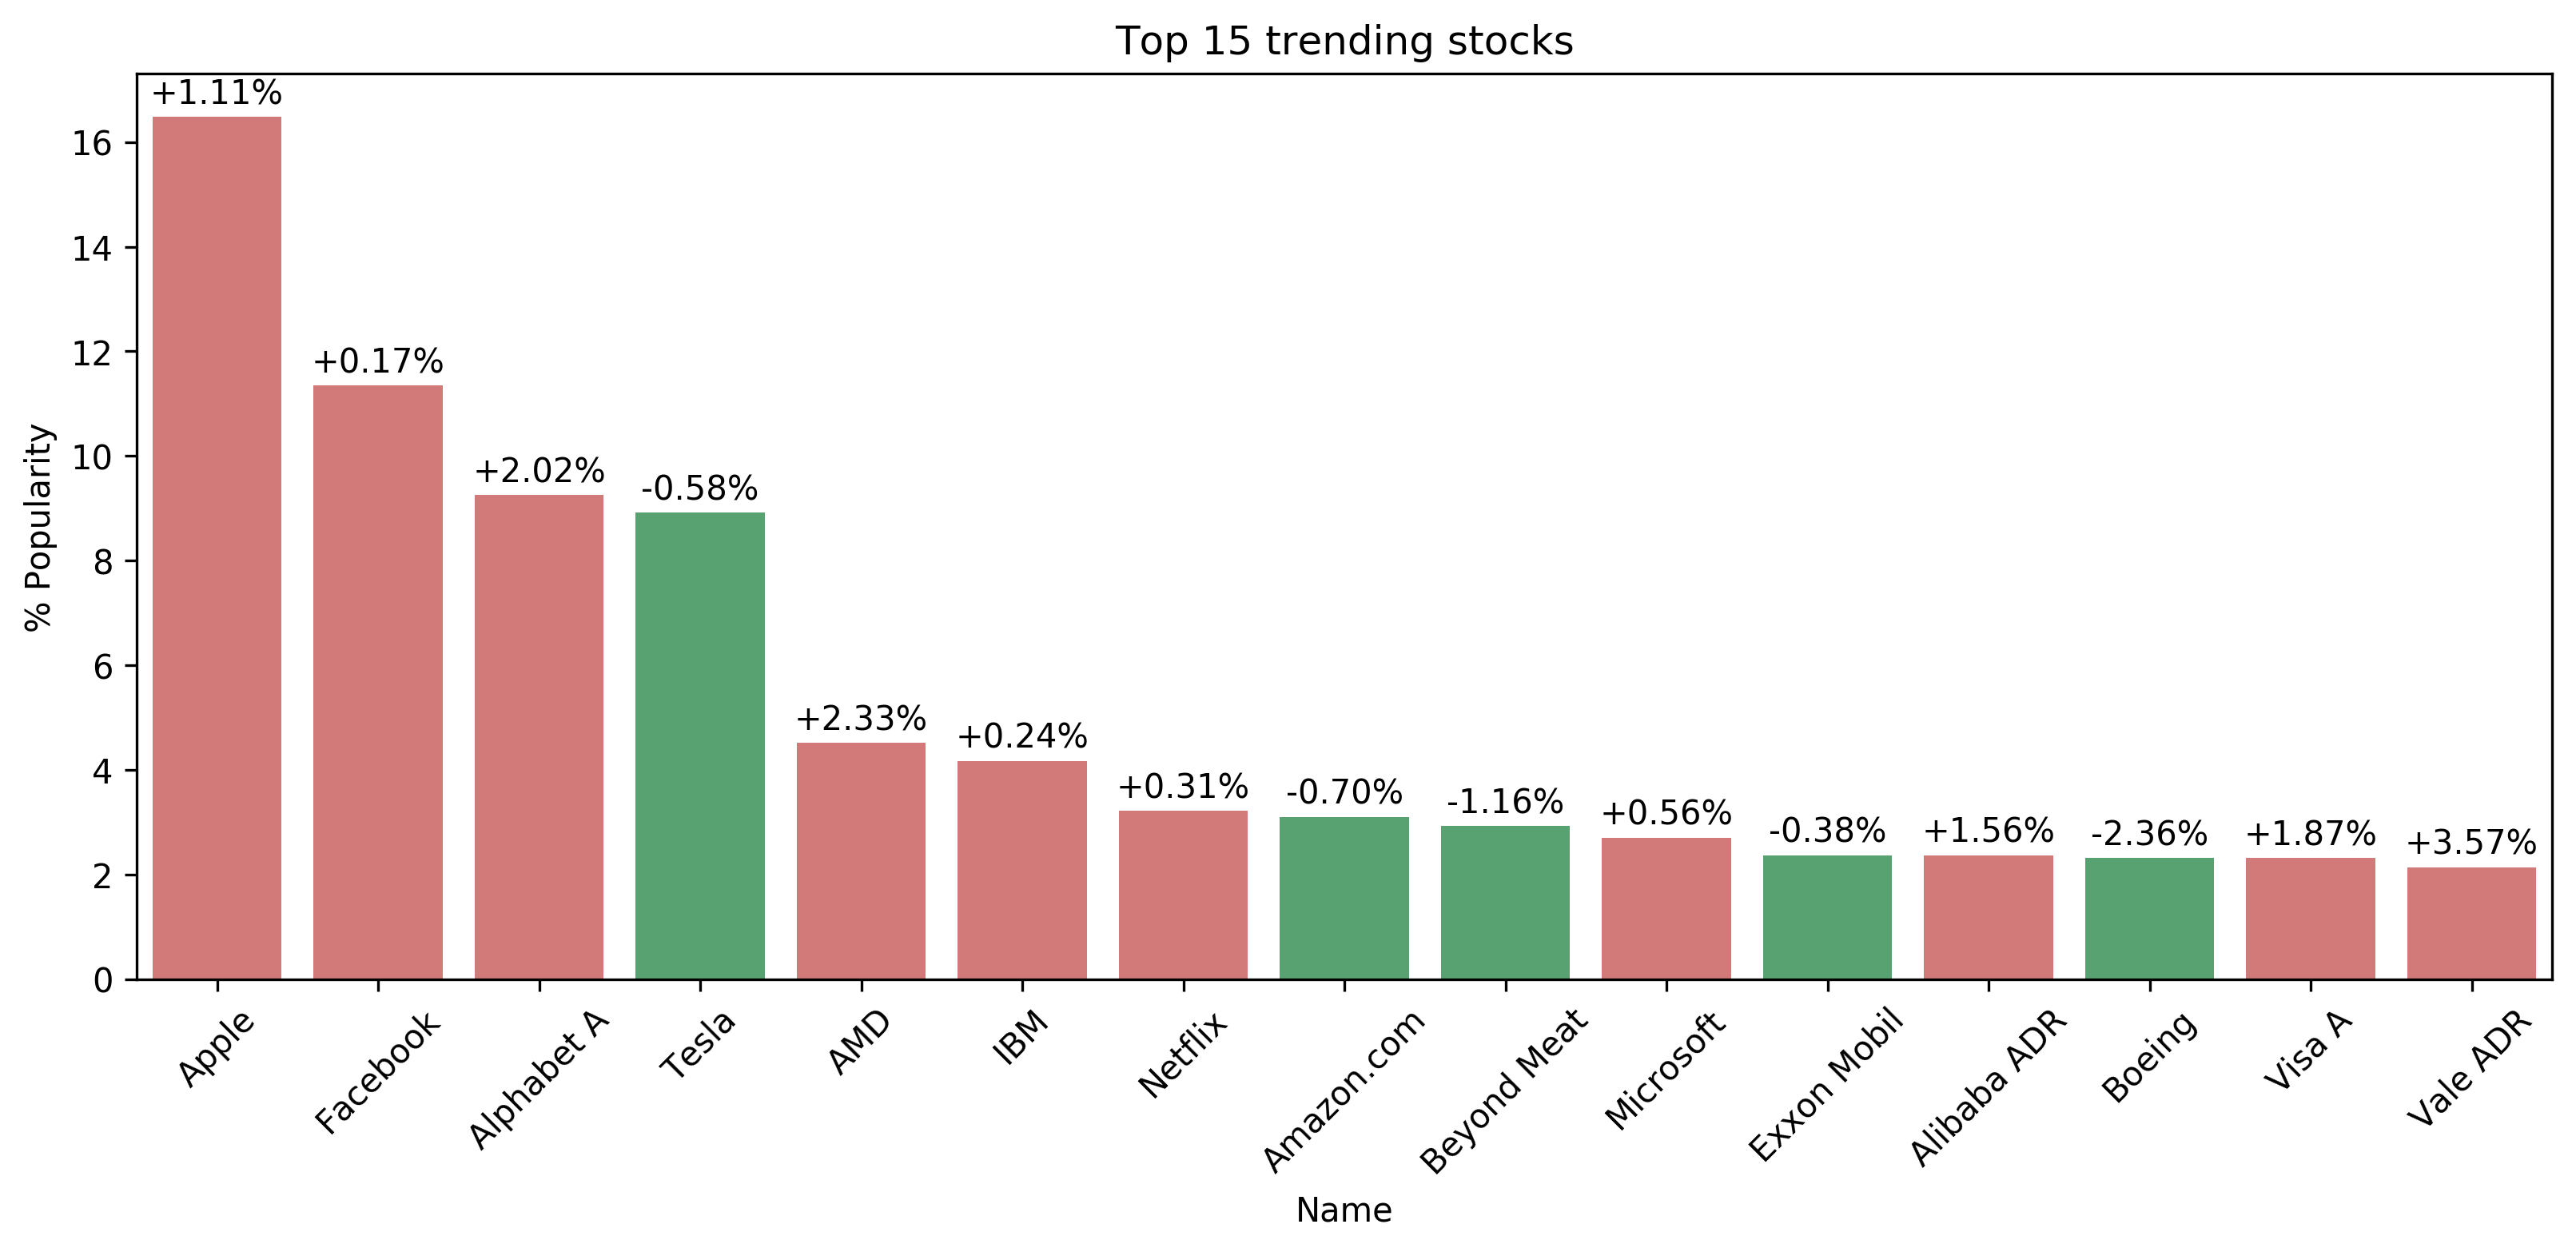

In [4]:
## To plot the popular stock data
stock = stock_popularity_data[3:-3]
person_dict = json.loads(stock)
stock_df=pd.DataFrame(person_dict)
d = stock_df.T
d['change']= ['positive' if float(x)>=0 else 'negative' for x in d['pair_change']]
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(13,5)
colors = ["#e06c6c", "#4cad6d"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(x="pair_name", y="percentage", data=d, hue=d['change'],dodge=False)
for item in ax.get_xticklabels():
    item.set_rotation(45)
y=[]
for i, v in enumerate(d.pair_change):
    ax.text(i, d.percentage[i] + .25, str(v)+"%", ha='center')
ax.set_xlabel('Name')
ax.set_ylabel('% Popularity')
ax.get_legend().remove()
ax.set_title("Top 15 trending stocks")
plt.show()

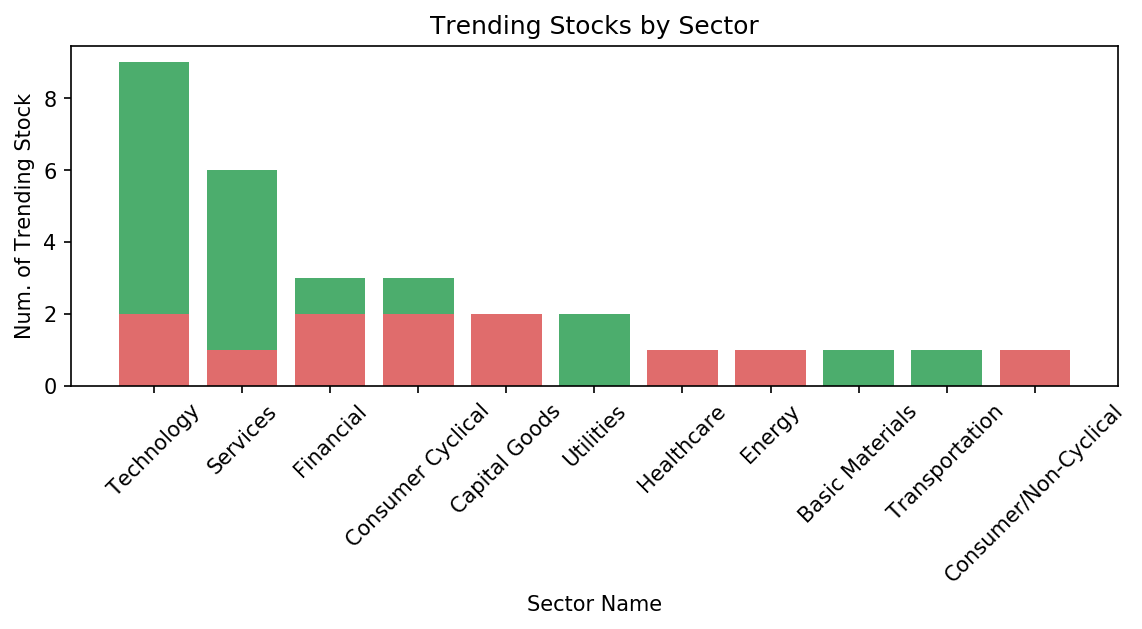

In [5]:
## To plot sector popularity data
sector = sector_popularity_data[3:-4]
sector_dict = json.loads(sector)
sector_df = pd.DataFrame(sector_dict)
names=[]
y1=[]
y2=[]
for x in list(sector_df.columns):
    count_p =0
    count_n=0
    count_neutral = 0
    names.append(sector_df[str(x)]['sectorName'])
    y1.append(len(sector_df[str(x)]['sectorPairs']))
    for y in (list((sector_df[str(x)]['sectorPairs']).values())):
        if float((list(y.values()))[0])>0:
            count_p+=1
        elif float((list(y.values()))[0])==0.0:
            count_neutral+=1
        else:
            count_n+=1
    y2.append([count_n,count_neutral,count_p])
df_sector= pd.DataFrame()
df_sector['names']=names
df_sector['count']=y1
df_sector['val']=y2
df2=(df_sector.sort_values(by = 'count', ascending=False))
z = np.array(list(df2.val)).T


fig, ax = plt.subplots(dpi=150)
fig.set_size_inches(9,3)
x = np.arange(len(names))
p1 = plt.bar(df2.names, z[0],color = '#e06c6c')
p2 = plt.bar(df2.names, z[1],bottom=z[0],color = '#808080')
p3 = plt.bar(df2.names, z[2],bottom=np.array(z[0])+np.array(z[1]),color = '#4cad6d')
for item in ax.get_xticklabels():
    item.set_rotation(45)
ax.set_xlabel('Sector Name')
ax.set_ylabel('Num. of Trending Stock')
ax.set_title("Trending Stocks by Sector")
plt.show()

In [6]:
## The function to return dataframes of the data fetched from the button
def return_df(page):
    doc = lh.fromstring(str(page))
    tr_elements = doc.xpath('//tr')
    col=[]
    i=0
    for t in tr_elements[0]:
        i+=1
        name=t.text_content()
        name = re.sub('\s+', '', name)
        col.append((name,[]))
    for j in range(1,len(tr_elements)):
        T=tr_elements[j]
        if len(T)!=len(col):
            break
        i=0
        for t in T.iterchildren():
            data=t.text_content() 
            if i>0:
                try:
                    data=data.rstrip("\n")
                    data = re.sub('\n\t', '', data)
                except:
                    pass
            col[i][1].append(data)
            i+=1
    Dict={title:column for (title,column) in col}
    df=pd.DataFrame(Dict)
    return(df)

In [7]:
## this cell scrapes the data using PhantomJS
url = 'https://www.investing.com/equities/trending-stocks'
browser = webdriver.PhantomJS('/home/saurabh/Downloads/phantomjs-2.1.1-linux-x86_64/bin/phantomjs')
browser.get(url)
browser.find_element_by_id('timeFrame_local').click() ## to load US equity data
time.sleep(2)
buttons = ['filter_price','filter_performance','filter_technical','filter_fundamental']
arr = []
for x in buttons:
    browser.find_element_by_id(x).click()## this loads the different tables based on the name on the buttons
    time.sleep(2)
    arr.append(return_df(browser.page_source))

/home/saurabh/anaconda3/envs/py36/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [8]:
## This is used to colour the dataframe as per the change
def color_negative_red(value):
    if value == '-' or value =='':
        return 'color: black'
    if value =='Neutral':
        return 'color: black'
    elif value.find('Sell')>= 0: 
        value = int(-1)
    elif value.find('Buy') >= 0: 
        value = int(1)
    if type(value)==str:
        value = value.replace('%','')
    if float(value) < 0:
        color = 'red'
    elif float(value) > 0:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color


In [9]:
## this creates coloured dataframes
performance = arr[1].style.applymap(color_negative_red, subset=['Daily','1Week','1Month','YTD','1Year','3Years'])
price = arr[0].style.applymap(color_negative_red, subset=['Chg.','Chg.%'])
technical = arr[2].style.applymap(color_negative_red, subset=['Hourly','Daily','Weekly','Monthly'])
fundamental = arr[3]

In [10]:
price

,,Name,Last,High,Low,Chg.,Chg.%,Vol.,Time
0,,Apple,318.73,318.74,315.00,+3.49,+1.11%,34.45M,17/01
1,,Facebook,222.14,222.29,220.53,+0.37,+0.17%,15.91M,17/01
2,,Alphabet A,"1,479.52","1,480.55","1,456.55",+29.36,+2.02%,2.62M,17/01
3,,Tesla,510.50,515.67,503.16,-2.99,-0.58%,13.63M,17/01
4,,AMD,50.93,51.05,49.90,+1.16,+2.33%,57.72M,17/01
5,,IBM,138.31,138.33,136.16,+0.33,+0.24%,5.62M,17/01
6,,Netflix,339.67,341.57,337.38,+1.05,+0.31%,6.07M,17/01
7,,Amazon.com,"1,864.72","1,886.64","1,857.25",-13.22,-0.70%,4.00M,17/01
8,,Beyond Meat,109.12,113.11,107.43,-1.28,-1.16%,10.45M,17/01
9,,Microsoft,167.10,167.47,165.43,+0.93,+0.56%,34.37M,17/01


In [11]:
performance

,,Name,Daily,1Week,1Month,YTD,1Year,3Years
0,,Apple,1.11%,0.56%,14.06%,8.54%,103.25%,165.61%
1,,Facebook,0.17%,0.10%,7.68%,8.23%,48.05%,74.86%
2,,Alphabet A,2.02%,2.74%,9.50%,10.46%,33.62%,78.65%
3,,Tesla,-0.58%,-2.74%,25.87%,22.03%,68.89%,108.60%
4,,AMD,2.33%,4.49%,15.36%,11.06%,145.21%,422.36%
5,,IBM,0.24%,1.25%,2.01%,3.19%,11.70%,-18.90%
6,,Netflix,0.31%,0.22%,0.82%,4.98%,0.17%,145.07%
7,,Amazon.com,-0.70%,-1.41%,4.38%,0.91%,9.94%,130.69%
8,,Beyond Meat,-1.16%,-4.57%,42.01%,44.34%,-,-
9,,Microsoft,0.56%,2.34%,6.16%,5.96%,55.14%,166.34%


In [12]:
technical

,,Name,Hourly,Daily,Weekly,Monthly
0,,Apple,Strong Buy,Strong Buy,Strong Buy,Strong Buy
1,,Facebook,Strong Buy,Strong Buy,Strong Buy,Strong Buy
2,,Alphabet A,Strong Buy,Strong Buy,Strong Buy,Strong Buy
3,,Tesla,Neutral,Strong Buy,Strong Buy,Strong Buy
4,,AMD,Strong Buy,Strong Buy,Strong Buy,Strong Buy
5,,IBM,Strong Buy,Strong Buy,Strong Buy,Neutral
6,,Netflix,Strong Buy,Strong Buy,Strong Buy,Strong Buy
7,,Amazon.com,Strong Sell,Neutral,Strong Buy,Strong Buy
8,,Beyond Meat,Neutral,Strong Buy,Strong Buy,Buy
9,,Microsoft,Strong Buy,Strong Buy,Strong Buy,Strong Buy


In [13]:
fundamental

,,Name,AverageVol.(3m),MarketCap,ROI(TTM),Beta
0,,Apple,26.93M,1.42T,,1.31
1,,Facebook,13.74M,633.49B,,1.06
2,,Alphabet A,1.42M,1.02T,,1.06
3,,Tesla,11.65M,92.02B,,0.65
4,,AMD,53.39M,56.72B,,3.1
5,,IBM,3.48M,122.49B,,1.34
6,,Netflix,6.22M,148.86B,,1.46
7,,Amazon.com,3.13M,924.52B,,1.59
8,,Beyond Meat,7.21M,6.71B,,-
9,,Microsoft,22.06M,1.27T,,1.17
